<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.4: Regularisation

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [2]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn

diabetes = datasets.load_diabetes()

In [3]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [5]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
# Target
y = diabetes.target

In [7]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### 1.2 Create a Base Model Using Linear Regression

In [8]:
# Create Model
model = LinearRegression()

In [9]:
# Fit
model.fit(X,y)

LinearRegression()

In [10]:
# Score
model.score(X,y)

0.5177484222203498

In [11]:
# Check Coefficient
model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [12]:
# Function to visualize the coefficients
def view_coeff(X, model):
    # Create a DataFrame to store coefficient values and variable names
    model_coefs = pd.DataFrame({'variable': X.columns,  # Extracting column names from the predictor matrix X
                                'coef': model.coef_,   # Coefficients from the fitted model
                                'abs_coef': np.abs(model.coef_)})  # Absolute values of coefficients for sorting
    
    # Sort the DataFrame by the absolute coefficient values in descending order
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    
    # Create a bar plot to visualize the coefficients
    sns.barplot(x="variable", y="coef", data=model_coefs)

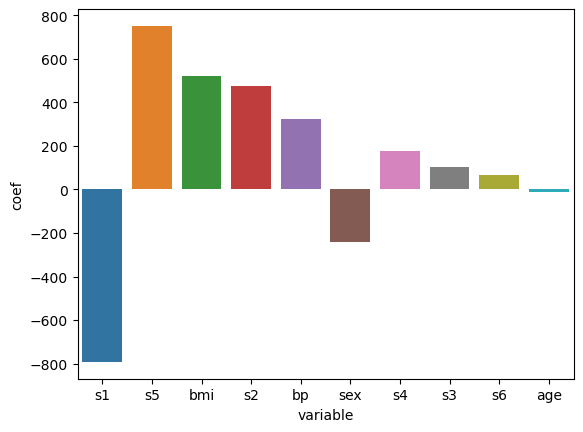

In [13]:
# Plot Coefficients
view_coeff(X, model)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [14]:
## Calculate Ridge Regression model

# Create a model object to hold the modelling parameters
ridgemodel = Ridge()

# Keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# Create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    # Loop through a list of alpha values for ridge regression
    ridgemodel.set_params(alpha=a)  # Set the alpha value for the Ridge model
    
    ridgemodel.fit(X, y)  # Fit the Ridge regression model to the data
    coefs.append(ridgemodel.coef_)  # Append the coefficients of the model to the 'coefs' list
    
    # Calculate and append the mean squared error between the coefficients of the Ridge model
    # and the coefficients of some reference model (probably 'model' from elsewhere in the code).
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

In [15]:
len(coefs)

200

##### 1.3.2 Visual Representation of Coefficient of Ridge Model

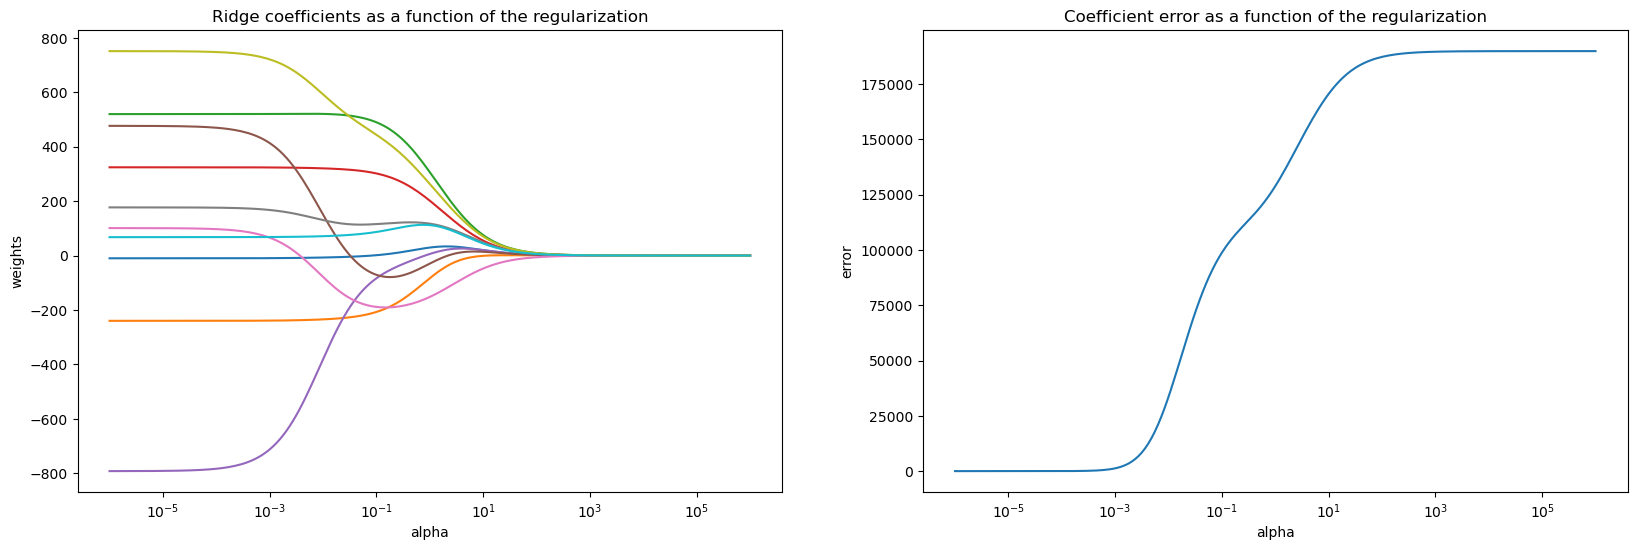

In [16]:
# Display results
plt.figure(figsize=(20, 6))

# Create the first subplot (on the left)
plt.subplot(121)
ax = plt.gca()  # Get the current axis

# Plot the coefficients (weights) of the Ridge models as a function of alpha
ax.plot(ridge_alphas, coefs)  # Plotting alpha values (x-axis) against coefficients (y-axis)
ax.set_xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('alpha')  # Label for the x-axis
plt.ylabel('weights')  # Label for the y-axis
plt.title('Ridge coefficients as a function of the regularization')  # Title for the subplot
plt.axis('tight')  # Automatically adjust the axis limits

# Create the second subplot (on the right)
plt.subplot(122)
ax = plt.gca()  # Get the current axis

# Plot the coefficient errors (MSE) of the Ridge models as a function of alpha
ax.plot(ridge_alphas, errors)  # Plotting alpha values (x-axis) against errors (y-axis)
ax.set_xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('alpha')  # Label for the x-axis
plt.ylabel('error')  # Label for the y-axis
plt.title('Coefficient error as a function of the regularization')  # Title for the subplot
plt.axis('tight')  # Automatically adjust the axis limits

plt.show()  # Display the entire figure with both subplots

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [17]:
## Optimal Ridge using RigdeCV

# Create a RidgeCV model with specified alpha values and cross-validation
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)

# Fit the RidgeCV model to the data
optimal_ridge.fit(X, y)

# Print the optimal alpha (chosen by cross-validation)
print('Alpha:', optimal_ridge.alpha_)

# Print the R-squared score of the model on the data
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138352359035858


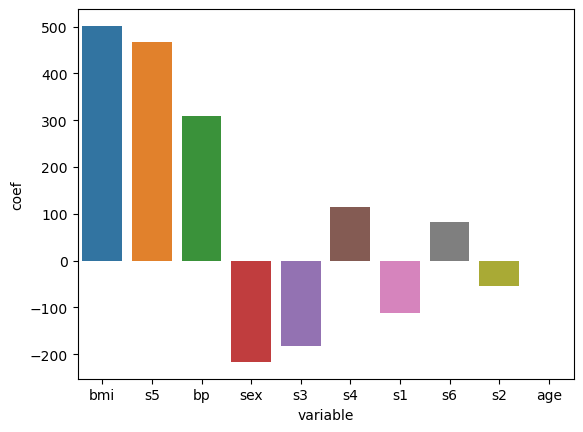

In [18]:
# Plot coefficient
view_coeff(X, optimal_ridge)

In [19]:
optimal_ridge.coef_

array([  -1.26474186, -216.39460047,  501.54971795,  308.13254162,
       -112.18452928,  -54.47177855, -182.30247501,  114.03129811,
        466.75421801,   81.94402103])

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [20]:
## Calculate Lasso Regression model

# Create a model object to hold the modelling parameters
lassomodel = Lasso()

# Keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# Create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200) 

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))

##### 1.4.2 Visual Representation of Coefficient of Lasso Model

Hint: Same as Ridge

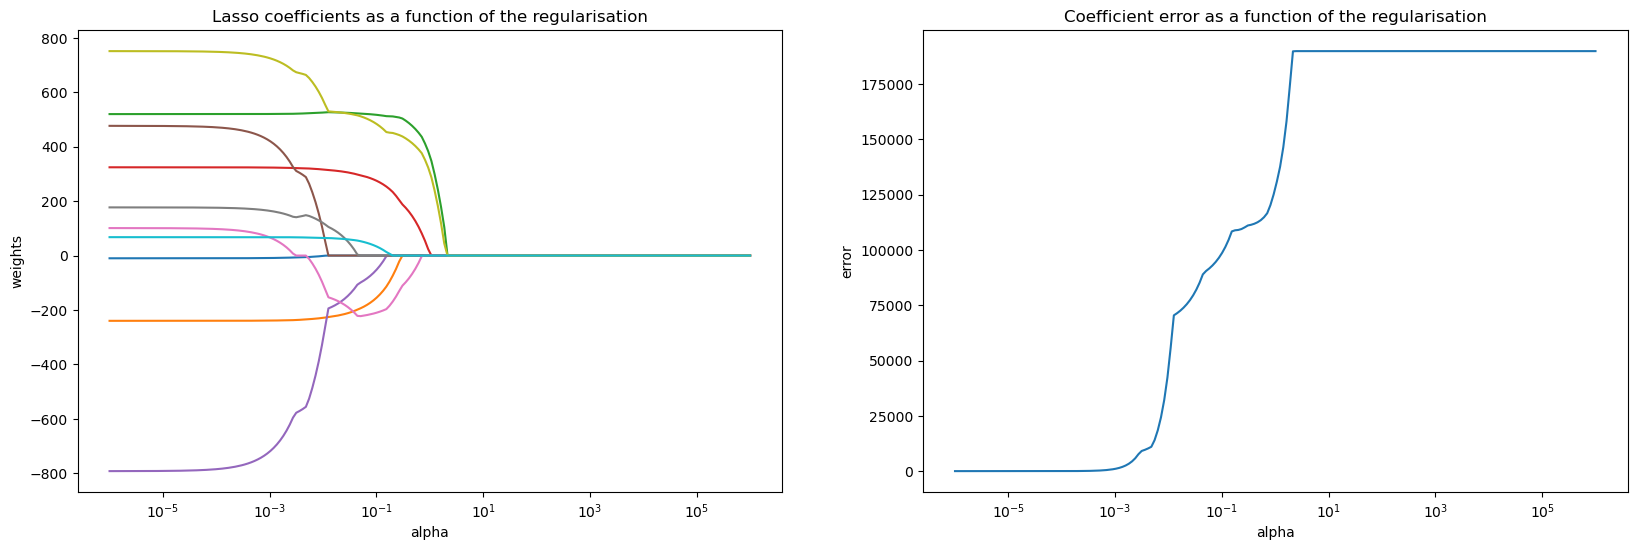

In [21]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.3. [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [22]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.05805225516094896
Score: 0.5126478025867265


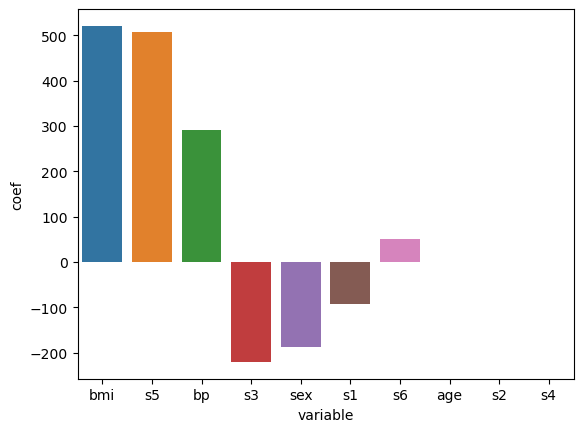

In [23]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [24]:
# Build the ridge and lasso using optimal alpha
ridge_model = Ridge(alpha=optimal_ridge.alpha_)
lasso_model = Lasso(alpha=optimal_lasso.alpha_)

In [25]:
# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge
ridge_model.fit(X, y)

Ridge(alpha=0.06669919663030115)

In [26]:
lasso_model.fit(X, y)

Lasso(alpha=0.05805225516094896)

In [27]:
# Model residuals
# Make predictions using Ridge and Lasso models
ridge_predictions = ridge_model.predict(X)
lasso_predictions = lasso_model.predict(X)

In [28]:
# Calculate residuals for Ridge and Lasso
ridge_residuals = y - ridge_predictions
lasso_residuals = y - lasso_predictions

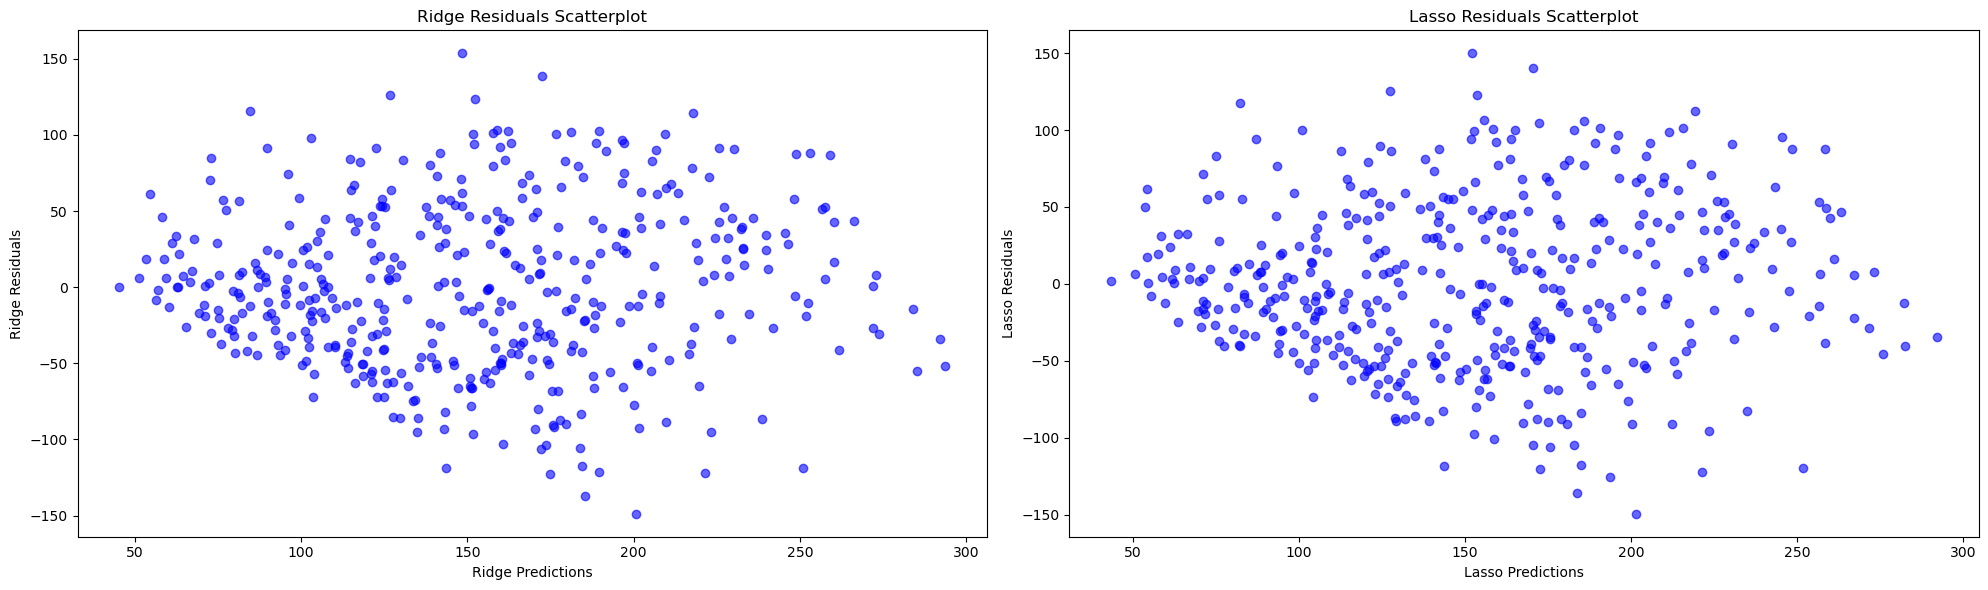

In [30]:
# Scatter plot   
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121) # Subplot for Ridge residuals
plt.scatter(ridge_predictions, ridge_residuals, c='blue', alpha=0.6)
plt.xlabel('Ridge Predictions')
plt.ylabel('Ridge Residuals')
plt.title('Ridge Residuals Scatterplot')

plt.subplot(122) # Subplot for Lasso residuals
plt.scatter(lasso_predictions, lasso_residuals, c='blue', alpha=0.6)
plt.xlabel('Lasso Predictions')
plt.ylabel('Lasso Residuals')
plt.title('Lasso Residuals Scatterplot')

plt.tight_layout()
plt.show()

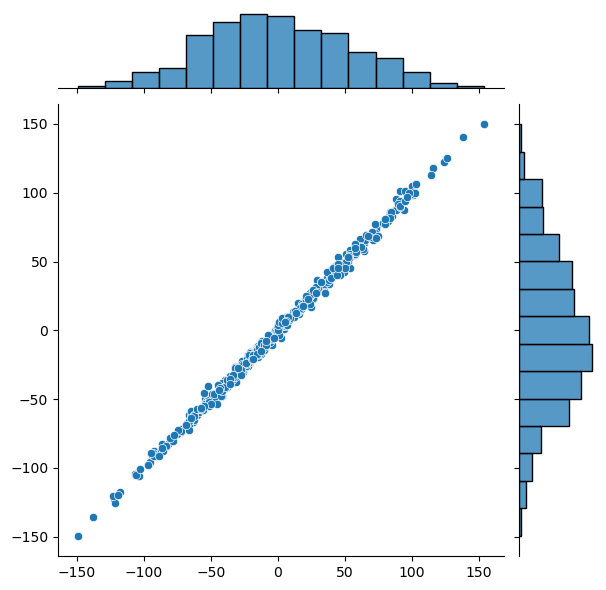

In [33]:
# Jointplot of Ridge and Lasso residuals
sns.jointplot(x=ridge_residuals, y=lasso_residuals);



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



